In [17]:
import numpy as np
import matplotlib.pyplot as plt

N =100
C4 = np.zeros(N)
C6 = np.zeros(N)
rho = np.zeros(N)
t = 10 # 6 nm
h = t/N

planck = 4.135667e-15/(2*np.pi) #eV*s


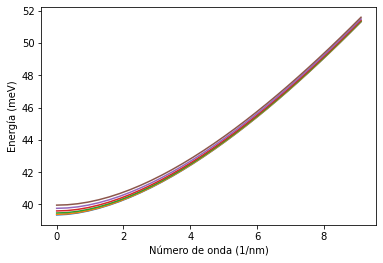

In [20]:
def mono_fill(): 
    for ii in range (N):
        C4[ii] = 91e3  #GaN and g/(nm*s)
        C6[ii] = 108e3 #GaN and g/(nm*s)
        rho[ii]= 6.1e-21  #GaN and g/nm^3

        
def multi_fill():
    ## 0 -- 2 -- 8 -- 10
    ##  AlN - GaN - AlN 
    for ii in range (N):
        if (ii*h >= 2) and (ii*h < 8):
            C4[ii] = 91e3  #GaN and g/(nm*s)
            C6[ii] = 108e3 #GaN and g/(nm*s)
            rho[ii]= 6.1e-21  #GaN and g/nm^3  
        else:
            C4[ii] = 115e3  #AlN and g/(nm*s)
            C6[ii] = 126e3 #AlN and g/(nm*s)
            rho[ii]= 3.255e-21  #AlN and g/nm^3
            

def matrix_A():
    A = np.zeros((N,N))
    for ii in range (N):
        A[ii][ii-1] = (-C4[(ii+1)%N] + 4*C4[ii] + C4[ii-1])/(4*h*h)
        A[ii][ii] = -2*C4[ii]/(h*h) - C6[ii]*k*k
        A[ii][(ii+1)%N] = (C4[(ii+1)%N] + 4*C4[ii] - C4[ii-1])/(4*h*h)
    return -A


def matrix_B():
    B = np.zeros((N,N))
    for ii in range (N):
        B[ii][ii] = rho[ii]
    return B

def matrix_C(BB):
    C = np.zeros((N,N))
    for ii in range (N):
        C[ii][ii] = (BB[ii][ii])**(1/2)
    return C

def matrix_C1(CC):
    C1 = np.zeros((N,N))
    for ii in range (N):
        C1[ii][ii] = 1/CC[ii][ii]
    return C1

def add_plot():
    plt.plot(K, W*planck*1000)
    #plt.xlim(0,10)
    #plt.ylim(62,75)
    plt.xlabel(r"Número de onda (1/nm)")
    #plt.ylabel(r"Frecuencia $\omega$ (Hz)")
    plt.ylabel(r"Energía (meV)")
    
        

steps = 30
W = np.zeros (steps)
K = np.zeros (steps)

   
for ii in range (0, 6, 1):
    kx = ii*np.pi/t
    for jj in range (steps):
        kz =(jj)*np.pi/t 
        k = np.sqrt(kx**2 +kz**2) 
        multi_fill()
        rho
        A = matrix_A()
        B = matrix_B()
        C = matrix_C(B)
        C1 = matrix_C1(C)
        P = np.matmul(C1, A)
        P = np.matmul(P, C1)
        w2, v = np.linalg.eig (P)
        w = np.sqrt(w2)
        W[jj] = np.average(w)
        K[jj] = kz
    add_plot()

#print(rho)
plt.show()

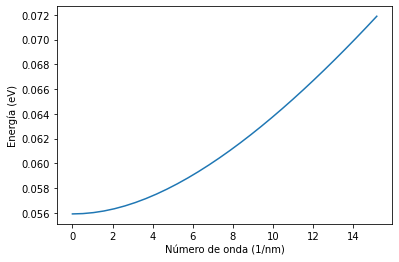

In [3]:
plt.plot(K, W*planck)
plt.xlabel(r"Número de onda (1/nm)")
#plt.ylabel(r"Frecuencia $\omega$ (Hz)")
plt.ylabel(r"Energía (eV)")
plt.show()
